In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_size = 64
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28 

# in general case, you always need to resize

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# train 70-80%, test 10-20%, validation 10-20%
# in training phase, model is tuned on training split, and evaluated on validation split
# in test phase, model is only evaluated on test split

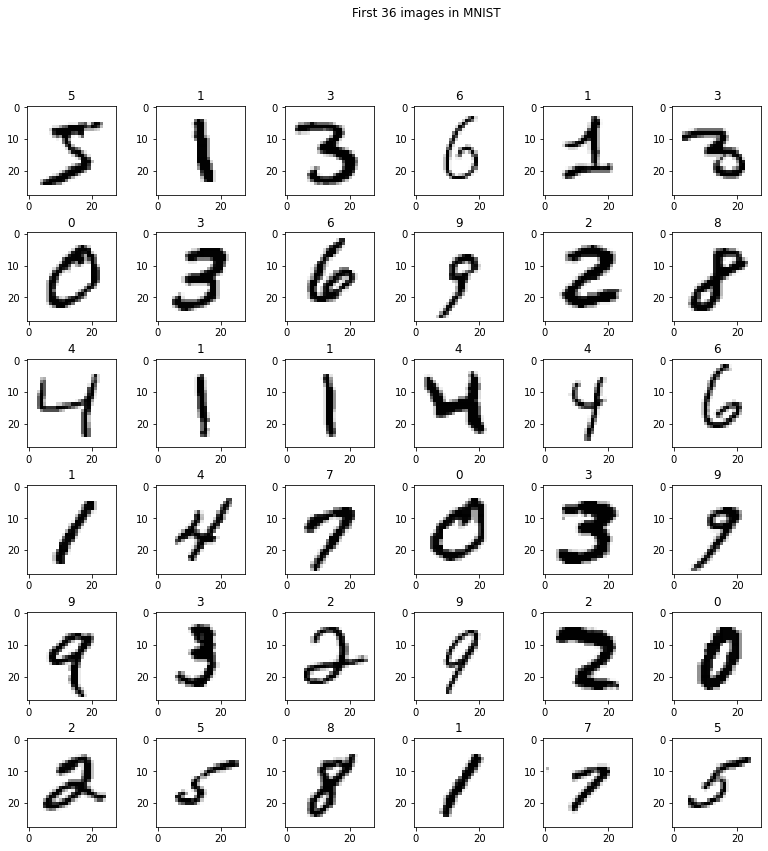

In [3]:
# Let's visualize a few training samples
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'binary')
    ax[x, y].set_title(y_train[x + y * 6])

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# images may be in shape (ch,width,height) or (width,height,ch)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Data Preprocessing added with descriptions

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False) # randomly flip images

#datagen = ImageDataGenerator()

datagen.fit(x_train)
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

C:\Users\brenn\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# New Model defined

In [7]:
from keras.layers.normalization import BatchNormalization


model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))



In [8]:
# once network is written, we need to compile it

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


# Model fitting method changed to allow augmented data

In [9]:
history = model.fit(train_gen, 
                      epochs = epochs, 
                      steps_per_epoch = x_train.shape[0] // batch_size,
                      validation_data = test_gen,
                      validation_steps = x_test.shape[0] // batch_size,
                      workers=4)
model.summary()

Epoch 1/12
937/937 [==============================] - 100s 106ms/step - loss: 0.2656 - accuracy: 0.9150 - val_loss: 0.0877 - val_accuracy: 0.9737
Epoch 2/12
937/937 [==============================] - 100s 106ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 3/12
937/937 [==============================] - 101s 108ms/step - loss: 0.0518 - accuracy: 0.9836 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 4/12
937/937 [==============================] - 100s 107ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 5/12
937/937 [==============================] - 101s 108ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 6/12
937/937 [==============================] - 102s 108ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 7/12
937/937 [==============================] - 100s 107ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0417 -

# Plot the loss and accuracy curves for training and validation 


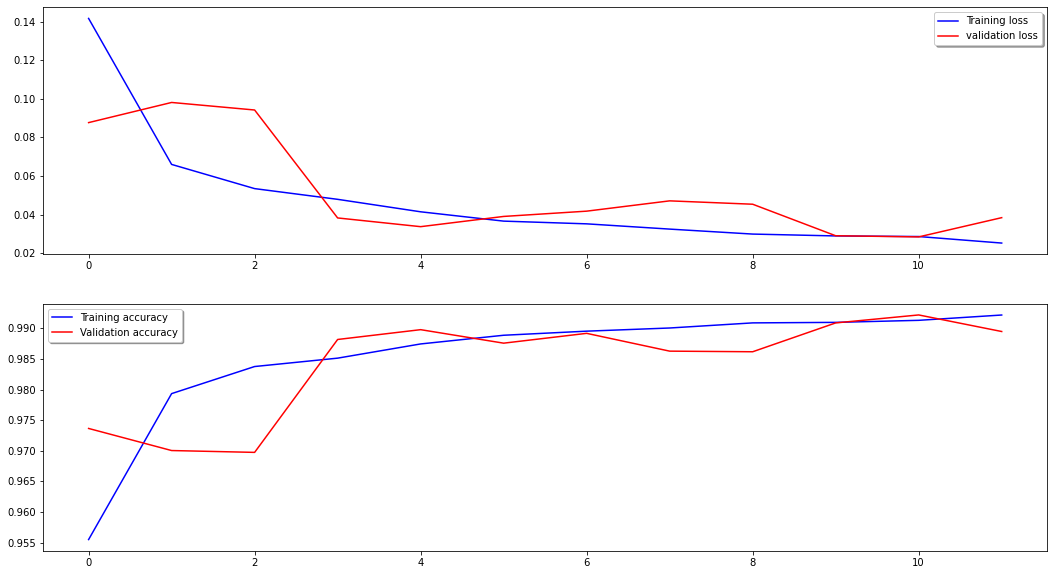

In [10]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Confusion Matrix

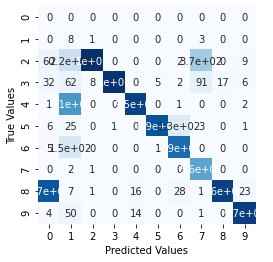

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Prediction check visually

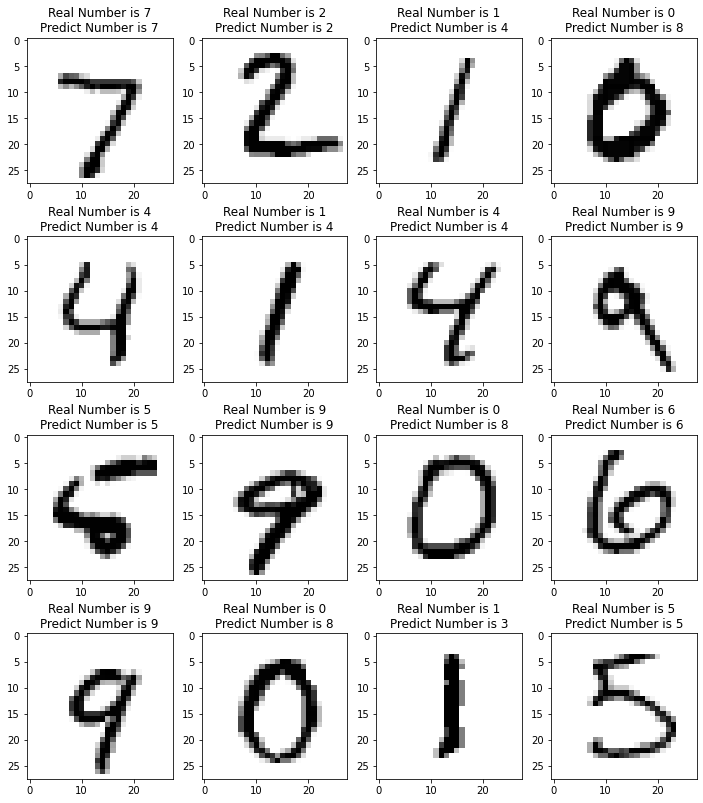

In [12]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");